# **Semanas 13: Aprendizado Supervisionado IV**
## **Atividade Semanal**

> Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

In [2]:
# NAO ALTERE OS COMANDOS ABAIXO
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1gHTyKAKazbWKZG1TBNy5S0JQWY47Rqh7'
output = 'churn_dataset.csv'
gdown.download(url, output, quiet=True)

churn_dataset = pd.read_csv('/content/churn_dataset.csv')

In [3]:
display(churn_dataset)

,estado,duracao_conta,cod_area,plano_internacional,plano_correio_voz,num_mensagens_correio_voz,total_minutos_manha,total_chamadas_manha,total_cobranca_manha,total_minutos_tarde,total_chamadas_tarde,total_cobranca_tarde,total_minutos_noite,total_chamadas_noite,total_cobranca_noite,total_minutos_internacional,total_chamadas_internacional,total_cobranca_internacional,chamadas_sac,churn
0,KS,128,415,N,S,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,N
1,OH,107,415,N,S,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,N
2,NJ,137,415,N,N,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,N
3,OH,84,408,S,N,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,N
4,OK,75,415,S,N,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,N,N,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,N
2662,AZ,192,415,N,S,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,N
2663,WV,68,415,N,N,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,N
2664,RI,28,510,N,N,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,N


> A empresa *CallWave Telecom* é uma das maiores operadoras de telefonia dos Estados Unidos. Ela oferece serviços de chamadas locais, interurbanas e internacionais, além de planos com correio de voz e suporte via atendimento ao cliente (SAC).
>
> Nos últimos meses, a empresa tem enfrentado um aumento preocupante na taxa de cancelamento de contratos — o famoso *churn*. Esse termo, usado no setor de negócios, significa quando um cliente deixa de utilizar os serviços da empresa, ou seja, cancela seu plano. Para uma operadora, o *churn* representa perda de receita e pode indicar problemas na qualidade do serviço ou na experiência do usuário.
>
> Preocupada com essa situação, a *CallWave* decidiu usar a ciência de dados para entender quem são os clientes com maior probabilidade de cancelar e, assim, poder agir preventivamente (com ofertas, melhorias no serviço ou contato personalizado).

> Seu desafio é identificar clientes com alta probabilidade de churn!

###Questão 1

Verifique se há registros duplicados, ausentes ou discrepantes na base. Caso positivo, remova-os.

In [4]:
# Questao 1
churn_dataset.duplicated().any() #não há valores duplicados

np.False_

In [5]:
churn_dataset.isna().sum() #não há valores ausentes

,0
estado,0
duracao_conta,0
cod_area,0
plano_internacional,0
plano_correio_voz,0
num_mensagens_correio_voz,0
total_minutos_manha,0
total_chamadas_manha,0
total_cobranca_manha,0
total_minutos_tarde,0


In [6]:
churn_dataset.describe() #não há valores discrepantes na tabela

,duracao_conta,cod_area,num_mensagens_correio_voz,total_minutos_manha,total_chamadas_manha,total_cobranca_manha,total_minutos_tarde,total_chamadas_tarde,total_cobranca_tarde,total_minutos_noite,total_chamadas_noite,total_cobranca_noite,total_minutos_internacional,total_chamadas_internacional,total_cobranca_internacional,chamadas_sac
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


###Questão 2

Após a base limpa e organizada, realize o pré-processamento para a aplicação de um modelo ML.

In [7]:
# Questao 2
#pré-processamento de dados
# Separando lista com os nomes
alvo='churn'
atributos=['estado','duracao_conta','cod_area','plano_internacional','plano_correio_voz','num_mensagens_correio_voz','total_minutos_manha','total_chamadas_manha','total_cobranca_manha','total_minutos_tarde','total_chamadas_tarde','total_cobranca_tarde','total_minutos_noite','total_chamadas_noite','total_cobranca_noite','total_minutos_internacional','total_chamadas_internacional','total_cobranca_internacional','chamadas_sac']
# Separando  nomes numericos ou  catégoria
atrib_num=['duracao_conta','cod_area','num_mensagens_correio_voz','total_minutos_manha','total_chamadas_manha','total_cobranca_manha','total_minutos_tarde','total_chamadas_tarde','total_cobranca_tarde','total_minutos_noite','total_chamadas_noite','total_cobranca_noite','total_minutos_internacional','total_chamadas_internacional','total_cobranca_internacional','chamadas_sac']
atrib_cat=['estado','plano_internacional','plano_correio_voz']
# Criando bases separadas
y = churn_dataset[alvo].to_frame().values.ravel()
X = churn_dataset[atributos]
# Criando bases separadas para numericos ou catégoria
X_num = X[atrib_num] # X somente com vars numericas
X_cat = X[atrib_cat] # X somente com vars categoricas

In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Pipeline para atributos numéricos
num_pipe = Pipeline([
    ('padronizacao', StandardScaler()),
    ('transformacao', PowerTransformer()),
    ('componentes', PCA())
])

# Transformacao para os atributos
atributos_transf = ColumnTransformer([
    # Transformacoes - Atributos numericos
    ('Atributos numericos', num_pipe, atrib_num),
    # Transformacoes - Atributos categoricos
    ('Atributos categoricos', OneHotEncoder(dtype='int', drop='first', handle_unknown='ignore'), atrib_cat)],
    remainder='drop',
    verbose_feature_names_out=False
)

# Aplicando a transformacao nos atributos
atributos_transf.fit(X)

ColumnTransformer(transformers=[('Atributos numericos',
                                 Pipeline(steps=[('padronizacao',
                                                  StandardScaler()),
                                                 ('transformacao',
                                                  PowerTransformer()),
                                                 ('componentes', PCA())]),
                                 ['duracao_conta', 'cod_area',
                                  'num_mensagens_correio_voz',
                                  'total_minutos_manha', 'total_chamadas_manha',
                                  'total_cobranca_manha', 'total_minutos_tarde',
                                  'total_chamadas_tarde',
                                  'total_cobranca_...otal_minutos_noite',
                                  'total_chamadas_noite',
                                  'total_cobranca_noite',
                                  'total_minutos_internacional',
                                  'total_chamadas_internacional',
                                  'total_cobranca_internacional',
                                  'chamadas_sac']),
                                ('Atributos categoricos',
                                 OneHotEncoder(drop='first', dtype='int',
                                               handle_unknown='ignore'),
                                 ['estado', 'plano_internacional',
                                  'plano_correio_voz'])],
                  verbose_feature_names_out=False)

###Questão 3

Escolha, ao menos, 2 modelos e treine-os utilizando esses dados. Compare visualmente suas previsões.

Usarei todos os modelos vistos: Classificador K-vizinhos,Máquinas de Suporte Vetorial,Árvore de Decisão e
Redes Neurais

Utilizando Regressão Logística:

In [9]:
from sklearn.linear_model import LogisticRegression

# Sequenciando as transformacoes necessarias
# para um alvo categórico
alvo_cat_rl = Pipeline(steps=[
   ('Logistica', LogisticRegression())
   ])

# Pipeline
pipe_cat_rl = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_cat_rl)])

In [10]:
# Ativando o modelo
pipe_cat_rl.fit(X, y)

Pipeline(steps=[('atributos',
                 ColumnTransformer(transformers=[('Atributos numericos',
                                                  Pipeline(steps=[('padronizacao',
                                                                   StandardScaler()),
                                                                  ('transformacao',
                                                                   PowerTransformer()),
                                                                  ('componentes',
                                                                   PCA())]),
                                                  ['duracao_conta', 'cod_area',
                                                   'num_mensagens_correio_voz',
                                                   'total_minutos_manha',
                                                   'total_chamadas_manha',
                                                   'total_cobranca_manha',
                                                   'total_minutos_tarde',
                                                   'total_cha...
                                                   'total_cobranca_noite',
                                                   'total_minutos_internacional',
                                                   'total_chamadas_internacional',
                                                   'total_cobranca_internacional',
                                                   'chamadas_sac']),
                                                 ('Atributos categoricos',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['estado',
                                                   'plano_internacional',
                                                   'plano_correio_voz'])],
                                   verbose_feature_names_out=False)),
                ('alvo',
                 Pipeline(steps=[('Logistica', LogisticRegression())]))])

In [11]:
# Previsao utilizando o modelo 'Regressão logística'
y_prev_rl = pipe_cat_rl.predict(X)

In [12]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Tabela de Contingência
tc_rl = pd.crosstab(y, y_prev_rl, rownames=['Observado'], colnames=['Previsto'])
display(tc_rl)

Previsto,N,S
Observado,,
N,2232,46
S,291,97


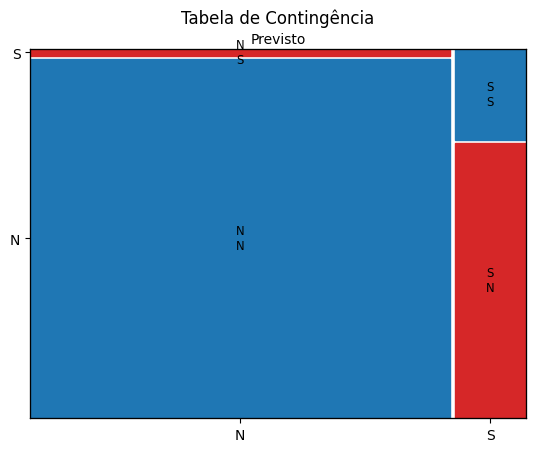

In [13]:
# Transformando `tc` para um dicionário
dados_tc_rl = {(str(row), str(col)): tc_rl.loc[row, col] for row in tc_rl.index for col in tc_rl.columns}
props = lambda key: {'color': 'tab:blue' if key[0] == key[1] else 'tab:red'}

# Mosaic plot
mosaic(dados_tc_rl, title='Tabela de Contingência', properties=props, gap=0.01)
plt.xlabel('Previsto')
plt.ylabel('Observado')
plt.show()

Utilizando o modelo *K-vizinhos*


In [14]:
# Questao 3
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
# Sequenciando as transformacoes necessarias
# para um alvo categórico
alvo_cat_kv = Pipeline(steps=[
   ('Kvizinhos', KNeighborsClassifier())
   ])

# Pipeline
pipe_cat_kv = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_cat_kv)])


In [15]:
# Ativando o modelo
pipe_cat_kv.fit(X, y)

Pipeline(steps=[('atributos',
                 ColumnTransformer(transformers=[('Atributos numericos',
                                                  Pipeline(steps=[('padronizacao',
                                                                   StandardScaler()),
                                                                  ('transformacao',
                                                                   PowerTransformer()),
                                                                  ('componentes',
                                                                   PCA())]),
                                                  ['duracao_conta', 'cod_area',
                                                   'num_mensagens_correio_voz',
                                                   'total_minutos_manha',
                                                   'total_chamadas_manha',
                                                   'total_cobranca_manha',
                                                   'total_minutos_tarde',
                                                   'total_cha...
                                                   'total_minutos_internacional',
                                                   'total_chamadas_internacional',
                                                   'total_cobranca_internacional',
                                                   'chamadas_sac']),
                                                 ('Atributos categoricos',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['estado',
                                                   'plano_internacional',
                                                   'plano_correio_voz'])],
                                   verbose_feature_names_out=False)),
                ('alvo',
                 Pipeline(steps=[('Kvizinhos', KNeighborsClassifier())]))])

In [16]:
# Previsao utilizando o modelo 'K vizinhos'
y_prev_kv = pipe_cat_kv.predict(X)

Previsto,N,S
Observado,,
N,2272,6
S,245,143


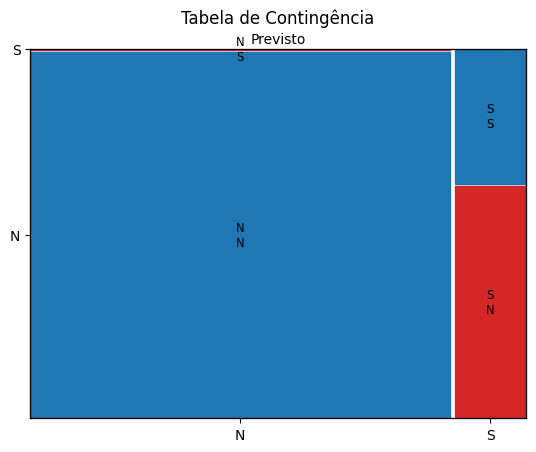

In [17]:
# Tabela de Contingência
tc_kv = pd.crosstab(y, y_prev_kv, rownames=['Observado'], colnames=['Previsto'])
display(tc_kv)

# Transformando `tc` para um dicionário
dados_tc_kv = {(str(row), str(col)): tc_kv.loc[row, col] for row in tc_kv.index for col in tc_kv.columns}
props = lambda key: {'color': 'tab:blue' if key[0] == key[1] else 'tab:red'}

# Mosaic plot
mosaic(dados_tc_kv, title='Tabela de Contingência', properties=props, gap=0.01)
plt.xlabel('Previsto')
plt.ylabel('Observado')
plt.show()

Utilizando *Máquinas de Suporte Vetorial*


In [18]:
from sklearn.svm import SVC

# Sequenciando as transformacoes necessarias
# para um alvo categórico
alvo_cat_sv = Pipeline(steps=[
   ('Logistica', SVC())
   ])

# Pipeline
pipe_cat_sv = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_cat_sv)])

In [19]:
# Ativando o modelo
pipe_cat_sv.fit(X, y)

Pipeline(steps=[('atributos',
                 ColumnTransformer(transformers=[('Atributos numericos',
                                                  Pipeline(steps=[('padronizacao',
                                                                   StandardScaler()),
                                                                  ('transformacao',
                                                                   PowerTransformer()),
                                                                  ('componentes',
                                                                   PCA())]),
                                                  ['duracao_conta', 'cod_area',
                                                   'num_mensagens_correio_voz',
                                                   'total_minutos_manha',
                                                   'total_chamadas_manha',
                                                   'total_cobranca_manha',
                                                   'total_minutos_tarde',
                                                   'total_cha...
                                                   'total_cobranca_noite',
                                                   'total_minutos_internacional',
                                                   'total_chamadas_internacional',
                                                   'total_cobranca_internacional',
                                                   'chamadas_sac']),
                                                 ('Atributos categoricos',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['estado',
                                                   'plano_internacional',
                                                   'plano_correio_voz'])],
                                   verbose_feature_names_out=False)),
                ('alvo', Pipeline(steps=[('Logistica', SVC())]))])

In [20]:
# Previsao utilizando o modelo 'SVM'
y_prev_sv = pipe_cat_sv.predict(X)

Previsto,N,S
Observado,,
N,2274,4
S,164,224


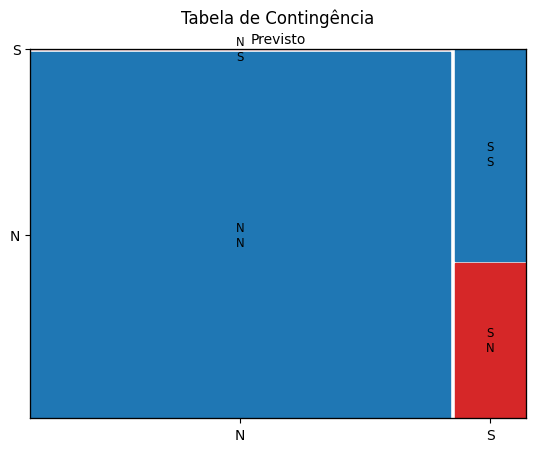

In [21]:
# Tabela de Contingência
tc_sv = pd.crosstab(y, y_prev_sv, rownames=['Observado'], colnames=['Previsto'])
display(tc_sv)

# Transformando `tc` para um dicionário
dados_tc_sv = {(str(row), str(col)): tc_sv.loc[row, col] for row in tc_sv.index for col in tc_sv.columns}
props = lambda key: {'color': 'tab:blue' if key[0] == key[1] else 'tab:red'}

# Mosaic plot
mosaic(dados_tc_sv, title='Tabela de Contingência', properties=props, gap=0.01)
plt.xlabel('Previsto')
plt.ylabel('Observado')
plt.show()

Utilizando árvores de Decisão:

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Sequenciando as transformacoes necessarias
# para um alvo categórico
alvo_cat_ad = Pipeline(steps=[
   ('Logistica', DecisionTreeClassifier())
   ])

# Pipeline
pipe_cat_ad = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_cat_ad)])

In [23]:
# Ativando o modelo
pipe_cat_ad.fit(X, y)

Pipeline(steps=[('atributos',
                 ColumnTransformer(transformers=[('Atributos numericos',
                                                  Pipeline(steps=[('padronizacao',
                                                                   StandardScaler()),
                                                                  ('transformacao',
                                                                   PowerTransformer()),
                                                                  ('componentes',
                                                                   PCA())]),
                                                  ['duracao_conta', 'cod_area',
                                                   'num_mensagens_correio_voz',
                                                   'total_minutos_manha',
                                                   'total_chamadas_manha',
                                                   'total_cobranca_manha',
                                                   'total_minutos_tarde',
                                                   'total_cha...
                                                   'total_minutos_internacional',
                                                   'total_chamadas_internacional',
                                                   'total_cobranca_internacional',
                                                   'chamadas_sac']),
                                                 ('Atributos categoricos',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['estado',
                                                   'plano_internacional',
                                                   'plano_correio_voz'])],
                                   verbose_feature_names_out=False)),
                ('alvo',
                 Pipeline(steps=[('Logistica', DecisionTreeClassifier())]))])

In [24]:
# Previsao utilizando o modelo 'Árvore de Decisão'
y_prev_ad = pipe_cat_ad.predict(X)

Previsto,N,S
Observado,,
N,2278,0
S,0,388


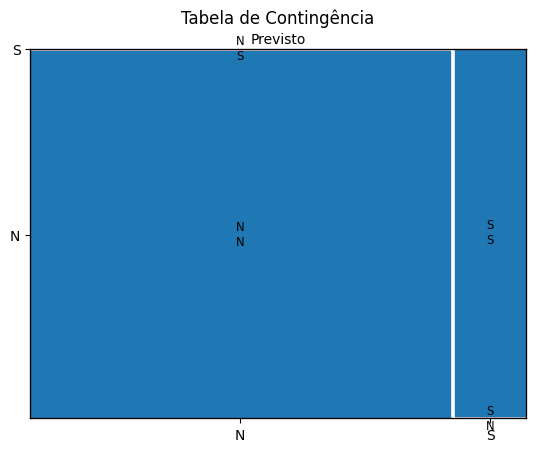

In [25]:
# Tabela de Contingência
tc_ad = pd.crosstab(y, y_prev_ad, rownames=['Observado'], colnames=['Previsto'])
display(tc_ad)

# Transformando `tc` para um dicionário
dados_tc_ad = {(str(row), str(col)): tc_ad.loc[row, col] for row in tc_ad.index for col in tc_ad.columns}
props = lambda key: {'color': 'tab:blue' if key[0] == key[1] else 'tab:red'}

# Mosaic plot
mosaic(dados_tc_ad, title='Tabela de Contingência', properties=props, gap=0.01)
plt.xlabel('Previsto')
plt.ylabel('Observado')
plt.show()

Utilizando *Redes Neurais*:

In [26]:
from sklearn.neural_network import MLPClassifier

# Sequenciando as transformacoes necessarias
# para um alvo categórico
alvo_cat_rn = Pipeline(steps=[
   ('Logistica', MLPClassifier())
   ])

# Pipeline
pipe_cat_rn = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_cat_rn)])

In [27]:
# Ativando o modelo
pipe_cat_rn.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('atributos',
                 ColumnTransformer(transformers=[('Atributos numericos',
                                                  Pipeline(steps=[('padronizacao',
                                                                   StandardScaler()),
                                                                  ('transformacao',
                                                                   PowerTransformer()),
                                                                  ('componentes',
                                                                   PCA())]),
                                                  ['duracao_conta', 'cod_area',
                                                   'num_mensagens_correio_voz',
                                                   'total_minutos_manha',
                                                   'total_chamadas_manha',
                                                   'total_cobranca_manha',
                                                   'total_minutos_tarde',
                                                   'total_cha...
                                                   'total_cobranca_noite',
                                                   'total_minutos_internacional',
                                                   'total_chamadas_internacional',
                                                   'total_cobranca_internacional',
                                                   'chamadas_sac']),
                                                 ('Atributos categoricos',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['estado',
                                                   'plano_internacional',
                                                   'plano_correio_voz'])],
                                   verbose_feature_names_out=False)),
                ('alvo', Pipeline(steps=[('Logistica', MLPClassifier())]))])

In [28]:
# Previsao utilizando o modelo 'Rede Neural'
y_prev_rn = pipe_cat_rn.predict(X)

Previsto,N,S
Observado,,
N,2278,0
S,7,381


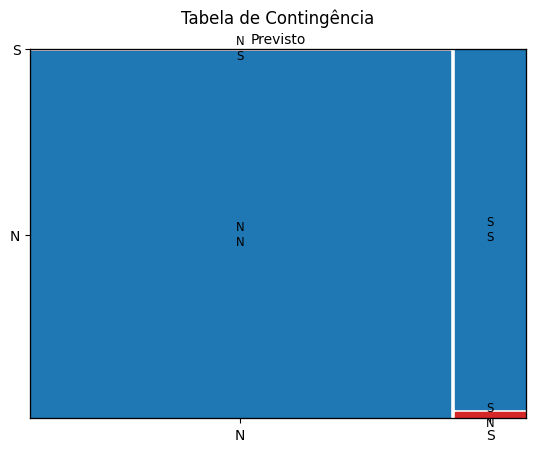

In [29]:
# Tabela de Contingência
tc_rn = pd.crosstab(y, y_prev_rn, rownames=['Observado'], colnames=['Previsto'])
display(tc_rn)

# Transformando `tc` para um dicionário
dados_tc_rn = {(str(row), str(col)): tc_rn.loc[row, col] for row in tc_rn.index for col in tc_rn.columns}
props = lambda key: {'color': 'tab:blue' if key[0] == key[1] else 'tab:red'}

# Mosaic plot
mosaic(dados_tc_rn, title='Tabela de Contingência', properties=props, gap=0.01)
plt.xlabel('Previsto')
plt.ylabel('Observado')
plt.show()


Agora visualizandos todos esses modelos juntos

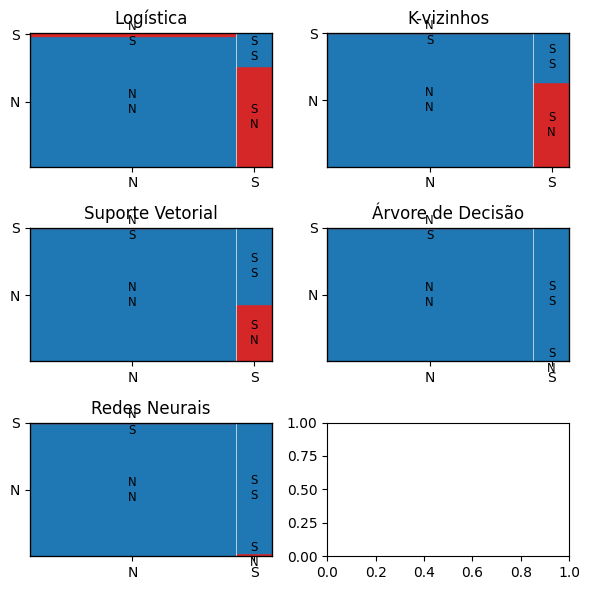

In [30]:
# Criar 6 scatter plots em uma grade 3x2
fig, axs = plt.subplots(3, 2, figsize=(6, 6))
axs = axs.flatten()

# Lista das previsoes feitas por cada modelo
y_preds = [y_prev_rl, y_prev_kv, y_prev_sv, y_prev_ad, y_prev_rn]
nomes = ['Logística', 'K-vizinhos', 'Suporte Vetorial', 'Árvore de Decisão', 'Redes Neurais']
cores = ['tab:blue', 'tab:green', 'tab:purple', 'tab:olive', 'tab:pink']
mosaic(dados_tc_rl, title=nomes[0], properties=props, gap=0.01, ax=axs[0])
mosaic(dados_tc_kv, title=nomes[1], properties=props, gap=0.01, ax=axs[1])
mosaic(dados_tc_sv, title=nomes[2], properties=props, gap=0.01, ax=axs[2])
mosaic(dados_tc_ad, title=nomes[3], properties=props, gap=0.01, ax=axs[3])
mosaic(dados_tc_rn, title=nomes[4], properties=props, gap=0.01, ax=axs[4])
plt.tight_layout()
plt.show()

###Questão 4

Antes da central de atendimento entrar em contato com um cliente, é necessário entender quão provável é o cancelamento de seu plano. Para fins de testes, vamos considerar um cliente do Estado de Nova Jersey (`NJ`) com as seguintes características:
*   Duração do contrato: 14 meses
*   Código de área: 415
*   Plano internacional: Não contratado
*   Plano correio de voz: Contratado
*   Total mensal de minutos (manhã): 180 minutos
*   Total mensal de chamadas recebidas (manhã): 50 minutos
*   Total mensal de cobrança (manhã): \$30
*   Total mensal de minutos (tarde): 200 minutos
*   Total mensal de chamadas recebidas (tarde): 100 minutos
*   Total mensal de cobrança (tarde): \$35
*   Total mensal de minutos (noite): 250 minutos
*   Total mensal de chamadas recebidas (noite): 50 minutos
*   Total mensal de cobrança (noite): \$5
*   Total mensal de minutos (internacional): 5 minutos
*   Total mensal de chamadas recebidas (internacional): 2 minutos
*   Total mensal de cobrança (internacional): \$15

Como o número de ligações para o SAC impacta a probabilidade de *churn* por parte deste cliente?

**Teste utilizando 0, 2 e 5 ligações.**

> OBS.: Utilize o modelo que você julga mais adequado.

O que acontece com relação ao *churn* conforme o aumento de chamadas para o SAC por parte do cliente?

Irei utilizar o modelo de regressão logística

In [46]:
# Questao 4
X_Cliente_Prev=pd.DataFrame({'estado':['NJ','NJ','NJ'],
'duracao_conta':[14,14,14],
'cod_area':[415,415,415],
'plano_internacional'	:['N','N','N'],
'plano_correio_voz':['S','S','S'],
'num_mensagens_correio_voz':[8,8,8],#não foi atríbuido um valor então constei como um zero
'total_minutos_manha':[180,180,180],
'total_chamadas_manha':[50,50,50],
'total_cobranca_manha':[30,30,30],
'total_minutos_tarde':[200,200,200],
'total_chamadas_tarde':[100,100,100],
'total_cobranca_tarde':[35,35,35],
'total_minutos_noite'	:[250,250,250],
'total_chamadas_noite':[50,50,50],
'total_cobranca_noite':[5,5,5],
'total_minutos_internacional':[5,5,5],
'total_chamadas_internacional':[2,2,2],
'total_cobranca_internacional':[15,15,15],
'chamadas_sac':[0,2,5],

})

# Previsao utilizando o modelo 'Regressão logística'
y_prev_rl_novo = pipe_cat_rl.predict(X_Cliente_Prev)

# DataFrame com previsões para novos imóveis
y_preds_novo = pd.DataFrame({
    'Número de chamadas SAC': [0, 2, 5],
    'Logística': y_prev_rl_novo.flatten(),
})

# Visualizando previsões para novos imóveis
display(y_preds_novo)

,Número de chamadas SAC,Logística
0,0,N
1,2,S
2,5,S


A previsão gerou o seguinte resultado: com o aumento de chamadas de 0 para 2  a chance do cliente cancelar o plano aumentou de acordo com o modelo de regressão logística